Diabetes Health Indicator Using Machine Learning

In [3]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Importing Machine Learning Libraries
from sklearn import metrics

# To plot the graphs in the notebook
%matplotlib inline

In [4]:
# Importing the dataset
dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
# replace the target values with species names
dataset['Diabetes_012'] = dataset['Diabetes_012'].replace([0.0, 1.0, 2.0],['no diabetes', 'prediabetes', 'diabetes'])
dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,no diabetes,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,no diabetes,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,no diabetes,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,no diabetes,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,no diabetes,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,no diabetes,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,diabetes,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,no diabetes,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,no diabetes,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Exploratory Data Analysis

In [6]:
# Return numerical summary of each attribute of iris
dataset.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
# let's check number of samples for each class of Terget variable
dataset['Diabetes_012'].value_counts()

no diabetes    213703
diabetes        35346
prediabetes      4631
Name: Diabetes_012, dtype: int64

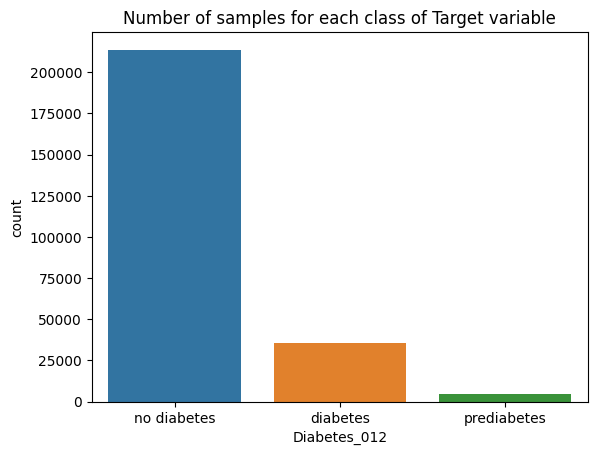

In [8]:
# let's visualise the number of samples for each class with count plot
sns.countplot(x ='Diabetes_012', data = dataset)
plt.title("Number of samples for each class of Target variable");

C:\Users\mahdi\AppData\Local\Temp\ipykernel_27660\2444744381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr().round(2)


<AxesSubplot: >

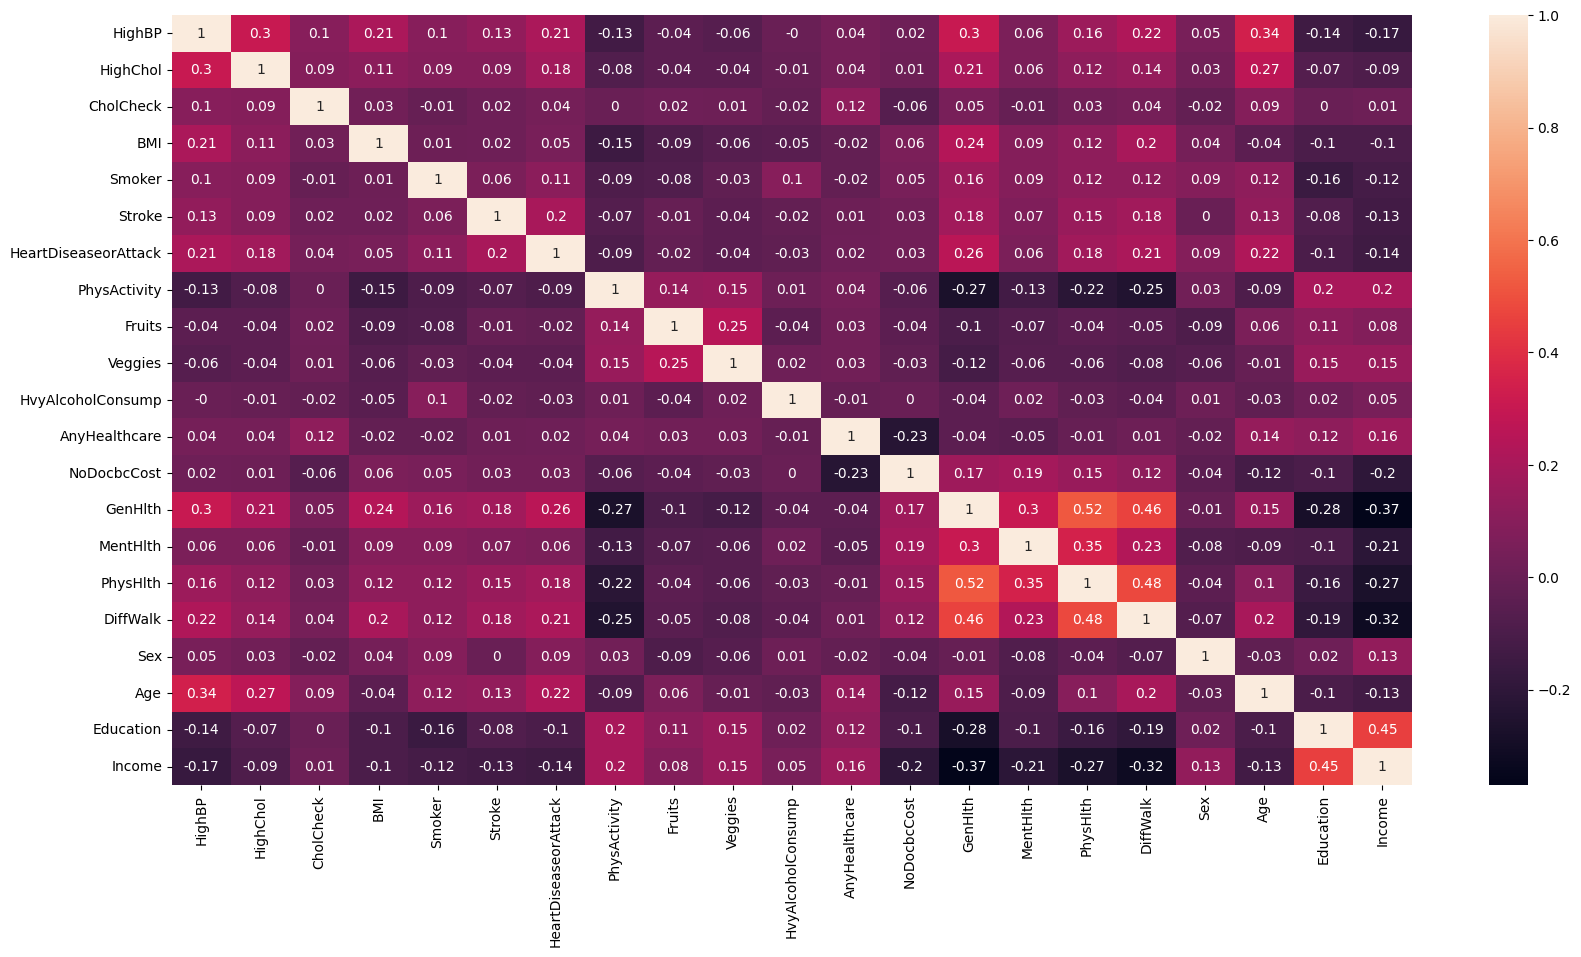

In [9]:
# corr() to calculate the correlation between variables
correlation_matrix = dataset.corr().round(2)

# changing the figure size
plt.figure(figsize=(20, 10))

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

<AxesSubplot: >

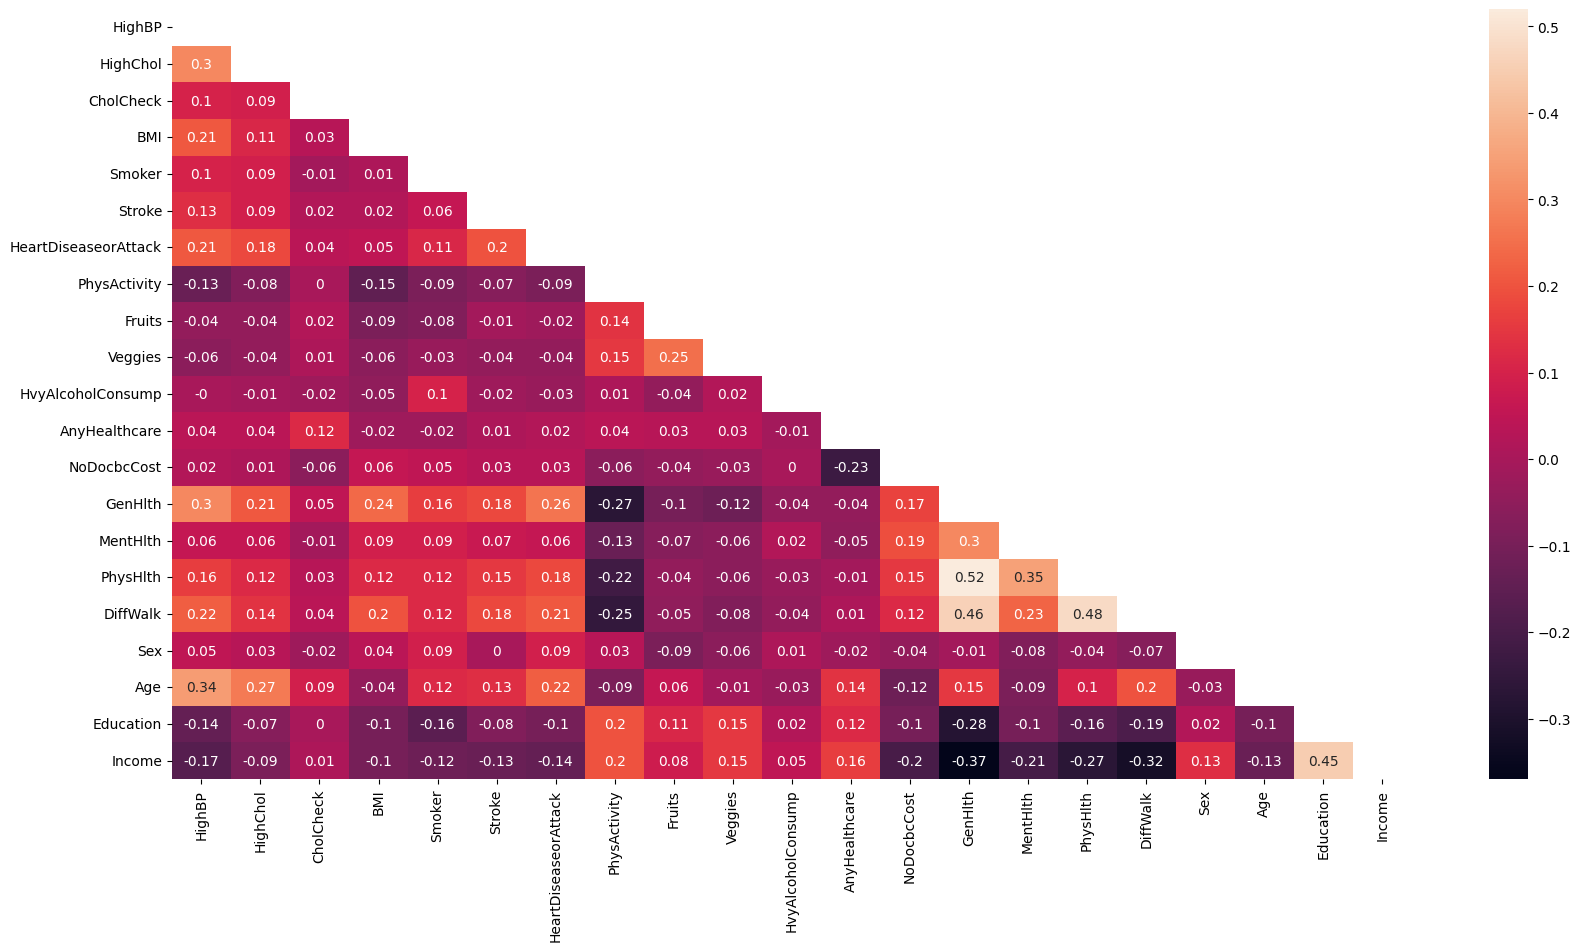

In [10]:
# Steps to remove redundant values

# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)

# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True

# changing the figure size
plt.figure(figsize=(20, 10))

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask)

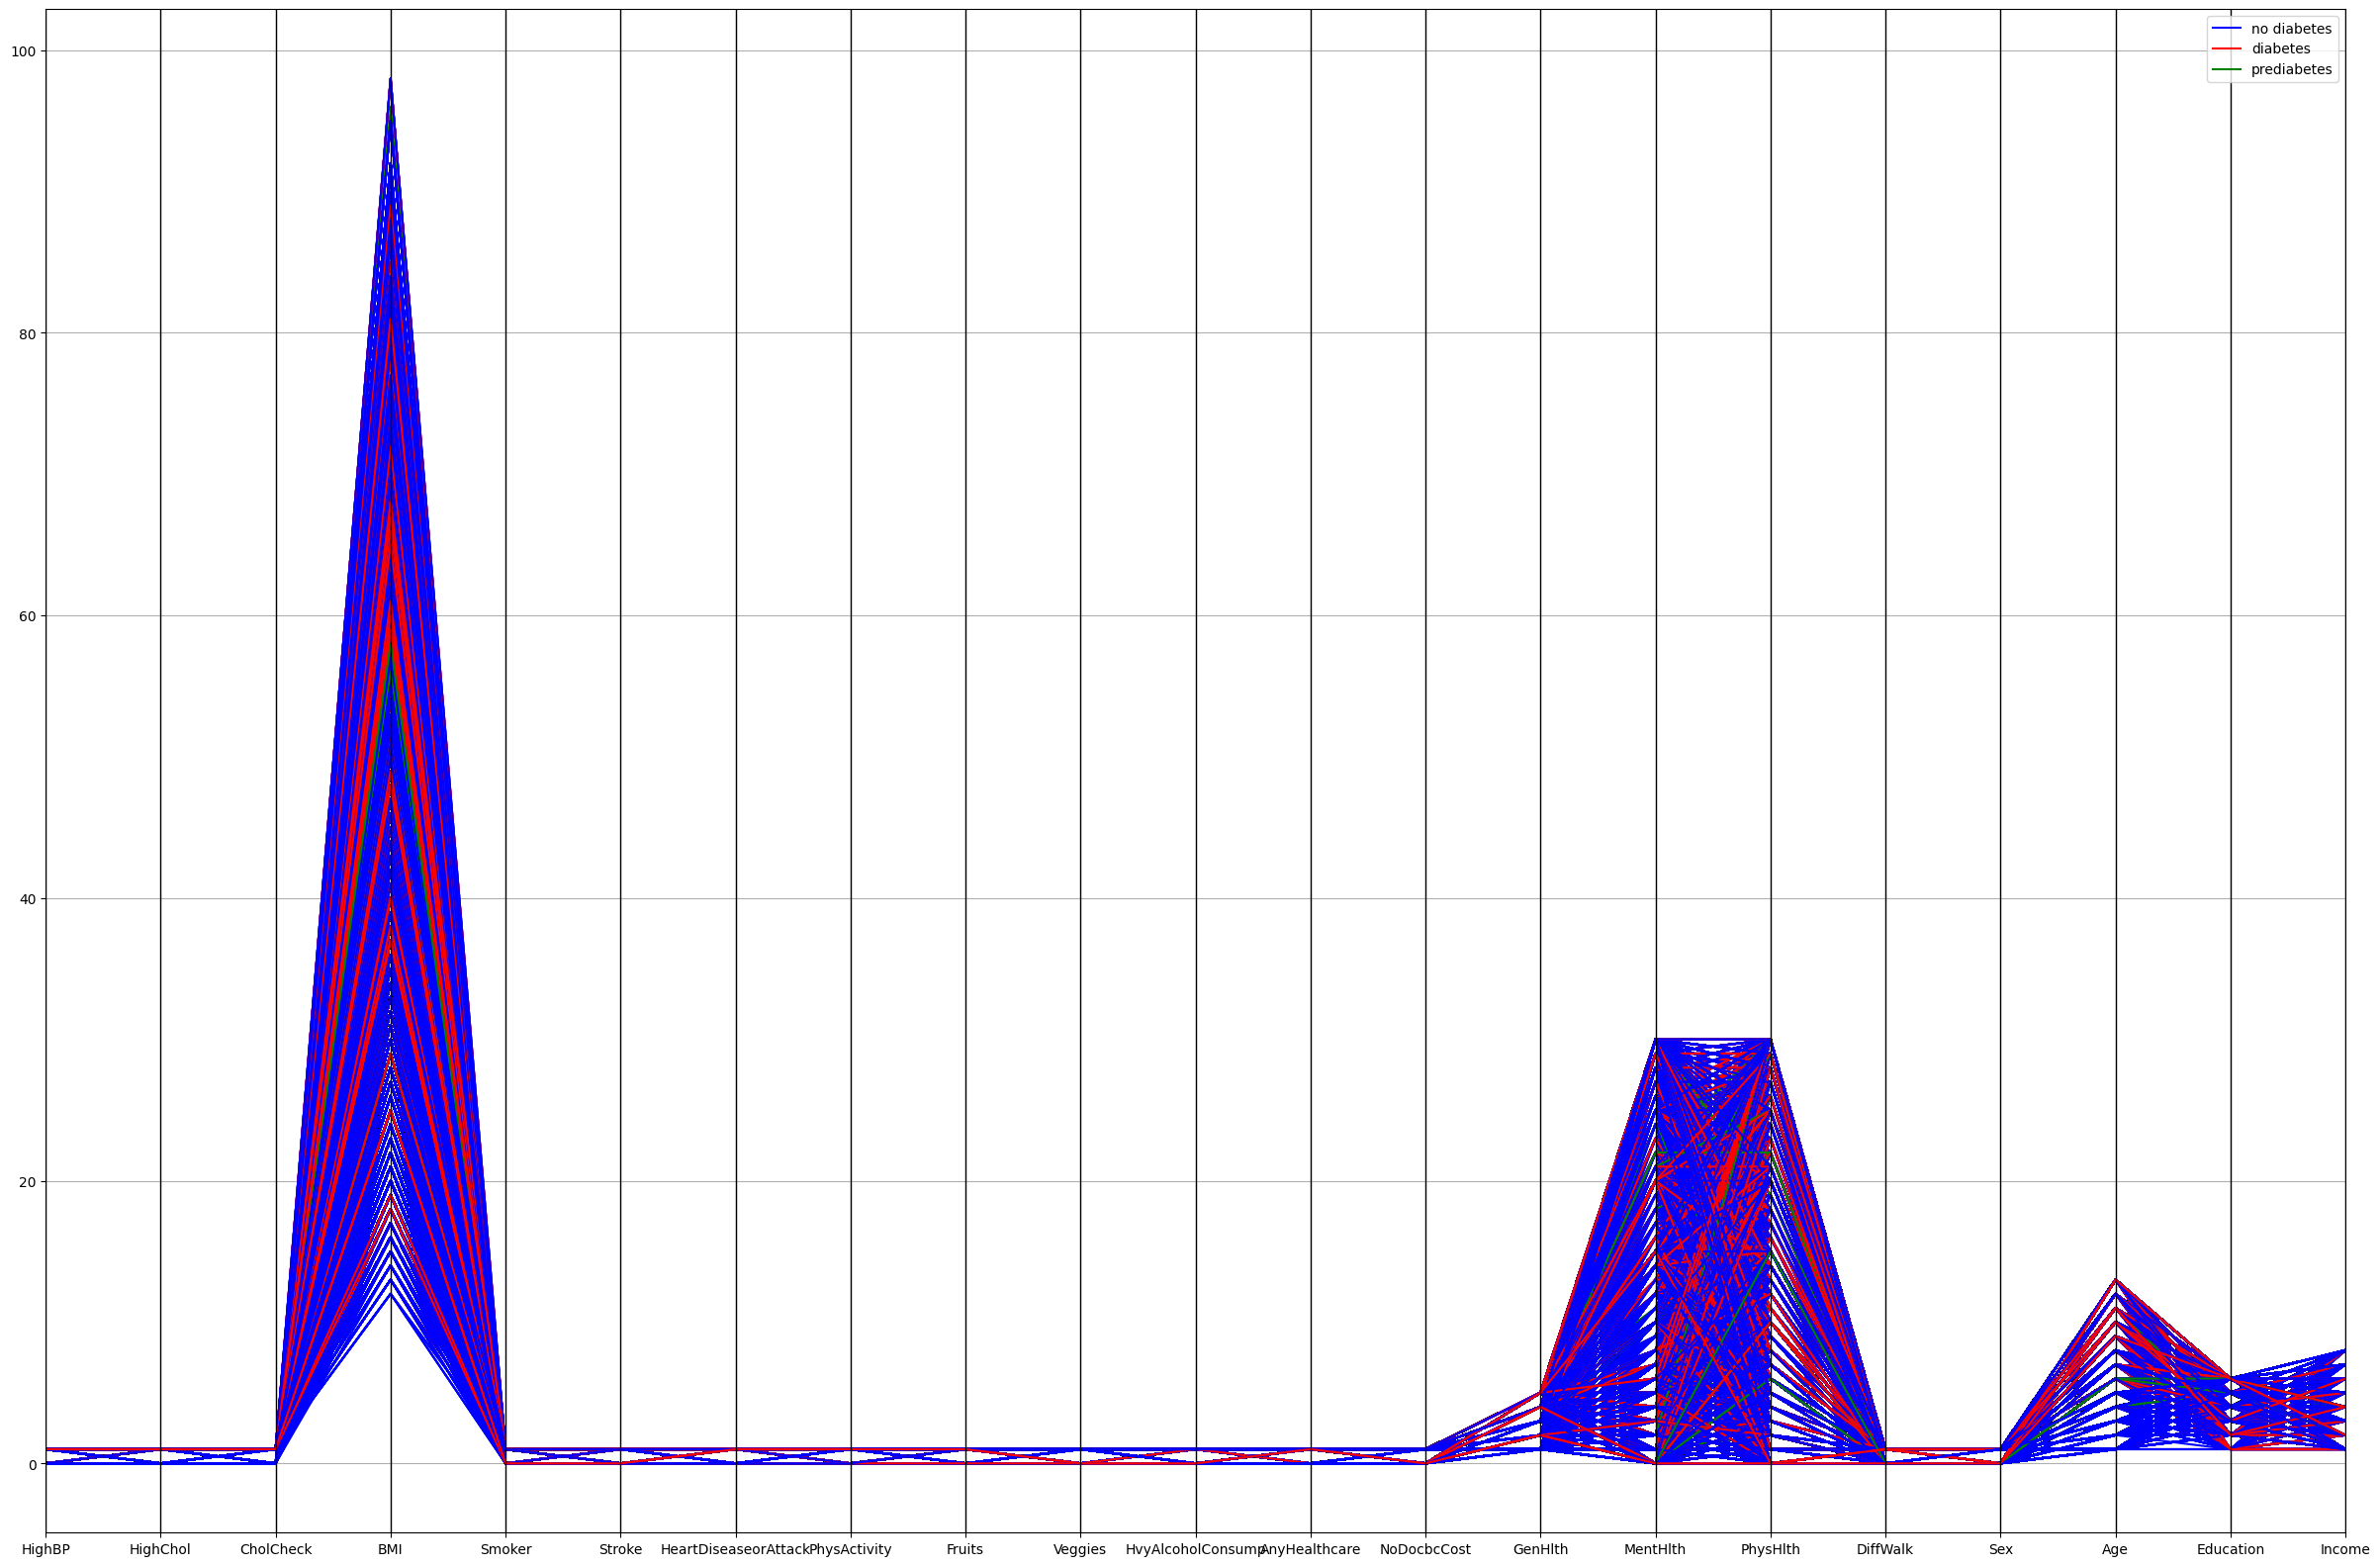

In [11]:
# figure size
plt.figure(figsize=(30, 20))
parallel_coordinates(dataset, "Diabetes_012", color = ['blue', 'red', 'green']);

# Create Features Matrix & Target Variable

In [16]:
# Feature matrix
X = dataset[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke' , 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [17]:
# Target variable
y = dataset['Diabetes_012']
y

0         no diabetes
1         no diabetes
2         no diabetes
3         no diabetes
4         no diabetes
             ...     
253675    no diabetes
253676       diabetes
253677    no diabetes
253678    no diabetes
253679       diabetes
Name: Diabetes_012, Length: 253680, dtype: object

# Split the dataset into training and testing sets

In [18]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (177576, 21)
y_train shape:  (177576,)
X_test shape:  (76104, 21)
y_test shape:  (76104,)


# Create Model: Support Vector Machine (SVM)

In [19]:
# Create Model: Support Vector Machine (SVM)
from sklearn import svm # "Support Vector Classifier"

# Create a svm Classifier
model_svm = svm.SVC()

# Train the model using the training sets
model_svm.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_svm = model_svm.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_pred_svm, y_test).round(4)

print("----------------------------------")
print("Accuracy of Support Vector Machine: ", score_svm)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = pd.DataFrame({'Model': ['Support Vector Machine'], 'Accuracy': [score_svm]})
model_accuracy

----------------------------------
Accuracy of Support Vector Machine:  0.8435
----------------------------------


,Model,Accuracy
0,Support Vector Machine,0.8435


# Create Model: Decision Tree

In [26]:
# Create Model: Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=4)

# Train the model using the training sets
model_dt.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_dt = model_dt.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_pred_dt, y_test).round(4)

print("----------------------------------")
print("Accuracy of Decision Tree: ", score_dt)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = model_accuracy.append({'Model': 'Decision Tree', 'Accuracy': score_dt}, ignore_index=True)
model_accuracy

----------------------------------
Accuracy of Decision Tree:  0.7664
----------------------------------


C:\Users\mahdi\AppData\Local\Temp\ipykernel_27660\3990903316.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_accuracy = model_accuracy.append({'Model': 'Decision Tree', 'Accuracy': score_dt}, ignore_index=True)


,Model,Accuracy
0,Support Vector Machine,0.8435
1,Decision Tree,0.7664
2,Decision Tree,0.7664
